**PROBABILITY FOR DATA SCIENCE: Project 3, Random Assignment Problem**

**NAME:** Letizia 

**SURNAME:** Lanza 

**ID:** VR502321

**ABSTRACT:** the random assignment problems consists of allocating *n* jobs to an equal number of machines to minimize a random total cost. We aim to estimate the expected cost value associated with the optimal solution.

**Step 1:** generate the cost matrix

Generate an *n* x *n* matrix with elements uniformly distributed between 0 and 1. 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
def cost_matrix(n):
    return np.random.uniform(0, 1, (n, n))

**Step 2:** define the total cost function 

Create a function to calculate the total cost for a given permutation of the cost matrix.

In [5]:
def total_cost(cost_matrix, permutation):
    total = 0 #initialize the total cost 
    
    for i in range(len(cost_matrix)):
        total += cost_matrix[i, permutation[i]] #add the cost from cost_matrix at index i, permutation[i] to total
    
    return total 

**Step 3:** implement the Metropolis - Hastings algorithm with history

Write the Metropolis - Hastings algorithm that keeps track of permutations and costs at each step.

In [6]:
def metropolis_hastings_with_history(cost_matrix, beta, initial_permutation, steps):
    n = len(initial_permutation)  #get the length of the permutation (number of elements to permute)
    permutations = [initial_permutation.copy()] #initialize the list of permutations with the initial permutation
    costs = [total_cost(cost_matrix, initial_permutation)] #initialize the list of costs with the cost of the initial permutation
    
    for t in range (1, steps):
        next_permutation = np.random.permutation(n) #generate a new random permutation
        new_cost = total_cost(cost_matrix, next_permutation) #calculate the cost of the new permutation
        acceptance_probability = np.exp(beta * (costs[t - 1] - new_cost)) #calculate the acceptance probability using the Metropolis-Hastings criterion
        
        if(np.random.uniform(0,1) < min(1, acceptance_probability)): 
            permutations.append(next_permutation) #if the permutation is accepted, append the new permutation and its cost to the lists
            costs.append(new_cost)
        else:
            permutations.append(permutations[t - 1]) #if the permutation is not accepted, append the previous permutation and cost to the lists
            costs.append(costs[t - 1])
    
    return permutations, costs

**Step 4:** simulations for different sizes and visualization of results 

Run simulations for different matrix sizes and visualize the results.

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_1711/2816057654.py:9: RuntimeWarning: overflow encountered in exp
  acceptance_probability = np.exp(beta * (costs[t-1] - new_cost))


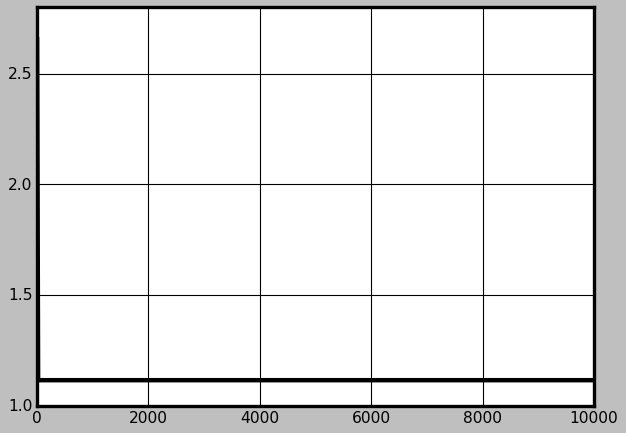

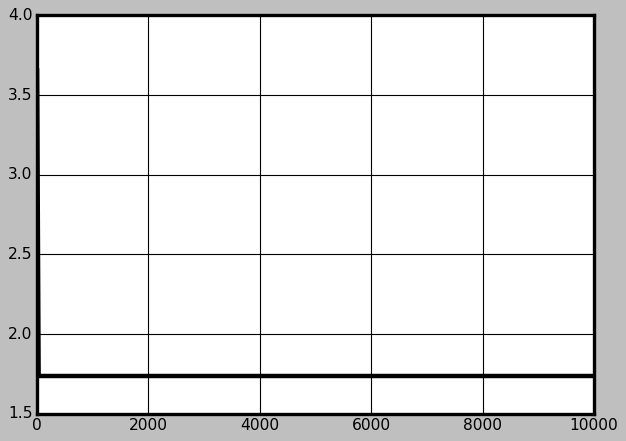

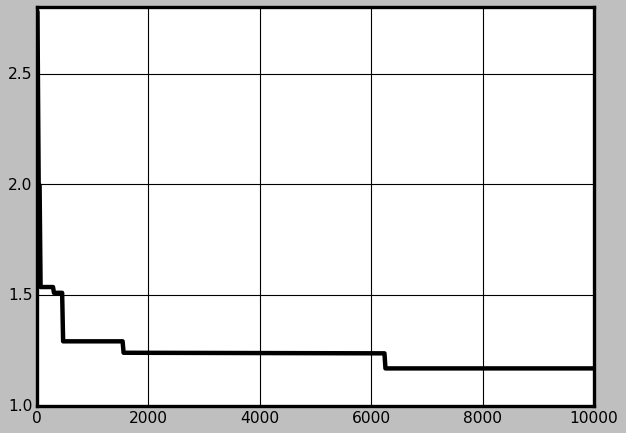

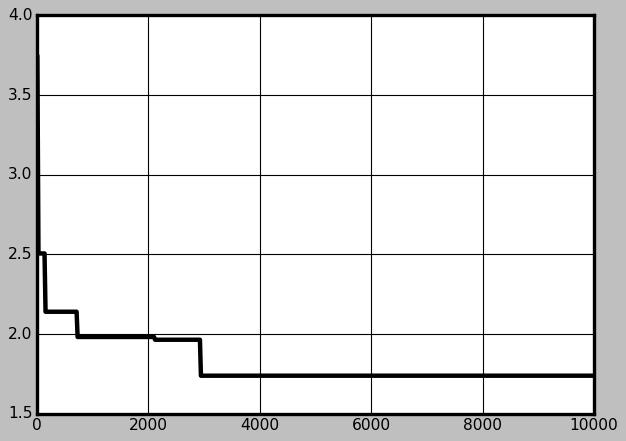

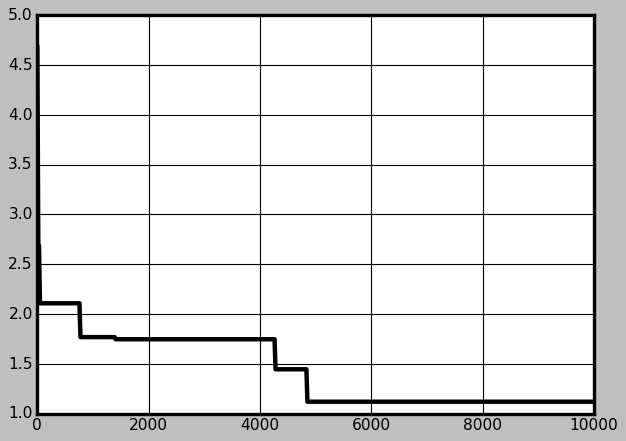

In [43]:
sizes = range(5, 10) #iterate over different sizes of the cost matrix
for n in sizes: 
    steps = 10000 #number of steps for Metropolis - Hastings algorithm
    beta = 10000 #beta parameter for Metropolis - Hastings algorithm
    matrix = cost_matrix(n) #generate a cost matrix for size n
    initial_permutation = np.random.permutation(n) #generate a random initial permutation of indices from 0 to n - 1
    _, y = metropolis_hastings_with_history(matrix, beta, initial_permutation, steps) #execute the Metropolis - Hastings algorithm and obtain the cost history
    
    plt.plot(range(steps), y)
    plt.show()

**Step 5:** implement the Metropolis - Hastings algorithm without history

Implement the Metropolis - Hasting algorithm that only tracks the final permutation and cost.

In [9]:
def metropolis_hastings(cost_matrix, beta, initial_permutation, steps):
    n = len(initial_permutation)
    permutation = initial_permutation.copy()
    cost = total_cost(cost_matrix, initial_permutation)
    
    for t in range(1, steps):
        next_permutation = np.random.permutation(n)
        new_cost = total_cost(cost_matrix, next_permutation)
        acceptance_probability = np.exp(beta * (cost - new_cost))
        if np.random.uniform(0, 1) < min(1, acceptance_probability):
            permutation = next_permutation
            cost = new_cost
    
    return permutation, cost

**Step 6:** estimate E(A*n*) for different sizes of *n*

Run the Metropolis - Hastings algorithm for different sizes of *n* and estimate E(A*n*).

In [10]:
ns = range(5, 10)
beta = 20  # Parameter for the Metropolis-Hastings algorithm
steps = 50000  # Number of steps for the Metropolis - Hastings algorithm
M = 100  # Number of independent realizations

estimated_costs = []
for n in ns:
    costs = []
    for _ in range(M):
        matrix = cost_matrix(n)
        initial_permutation = np.random.permutation(n)
        _, cost = metropolis_hastings(matrix, beta, initial_permutation, steps)
        costs.append(cost)
    estimated_costs.append(np.mean(costs))

**Step 7:** visualization of E(A*n*) estimated

Visualize the results of the E(A*n*) estimated for different sizes of *n*.

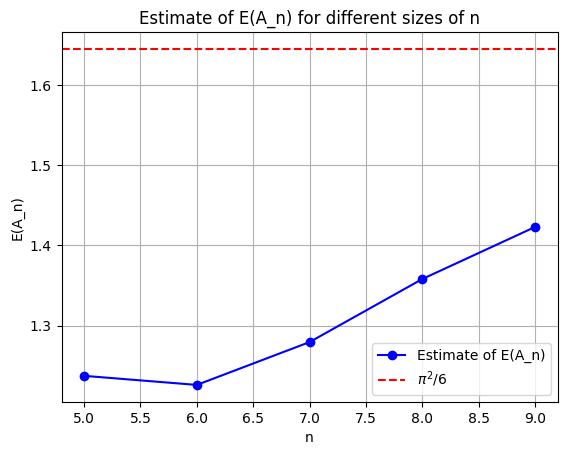

In [13]:
# Plot the results
plt.plot(ns, estimated_costs, marker='o', linestyle='-', color='b', label='Estimate of E(A_n)')
plt.axhline(y=np.pi**2 / 6, color='r', linestyle='--', label=r'$\pi^2 / 6$')
plt.xlabel('n')
plt.ylabel('E(A_n)')
plt.title('Estimate of E(A_n) for different sizes of n')
plt.legend()
plt.grid(True)
plt.show()